/var/folders/7_/qf5sf1f103bbvbxdw6lxcqn40000gn/T/ipykernel_81208/349066127.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)

 DATA CLEANING

 Null Values
price               0.0
area                0.0
bedrooms   

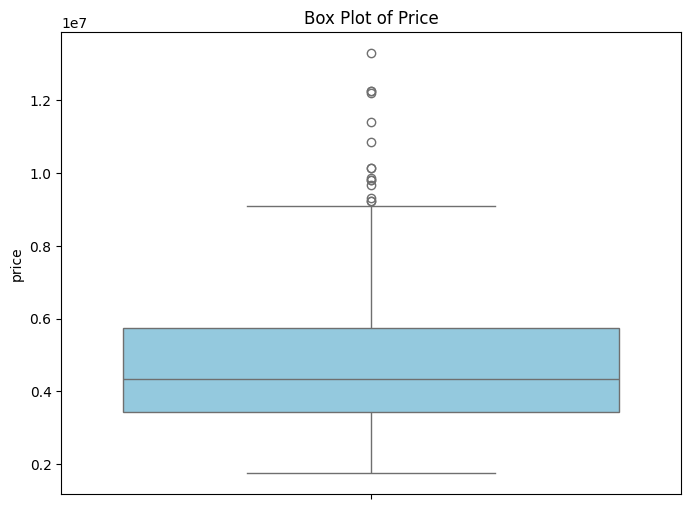

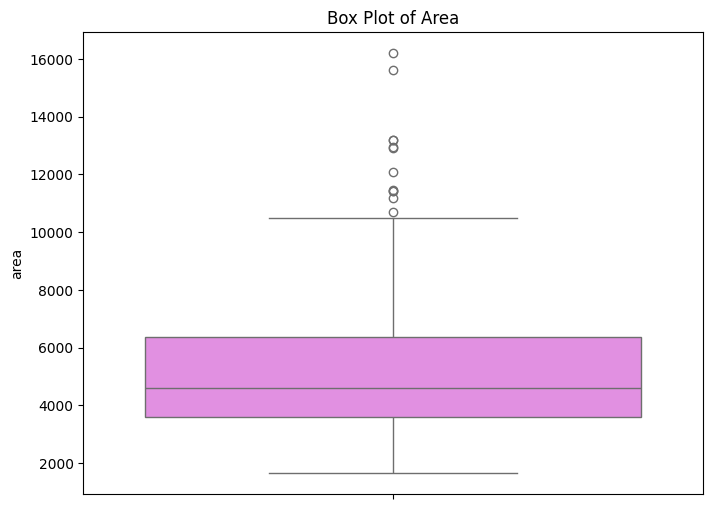

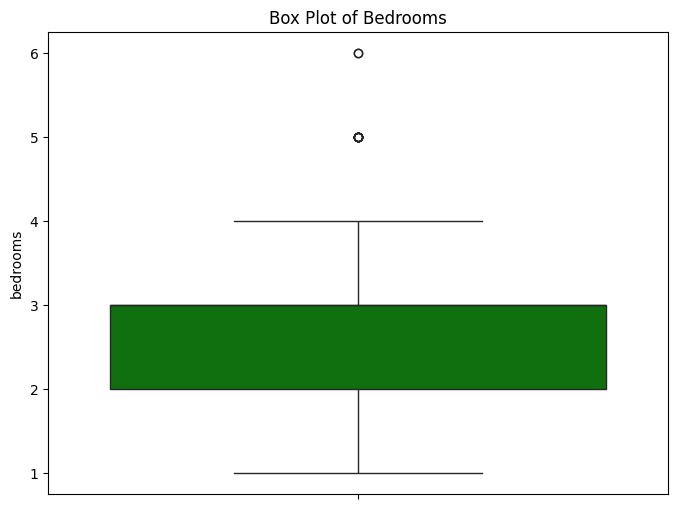

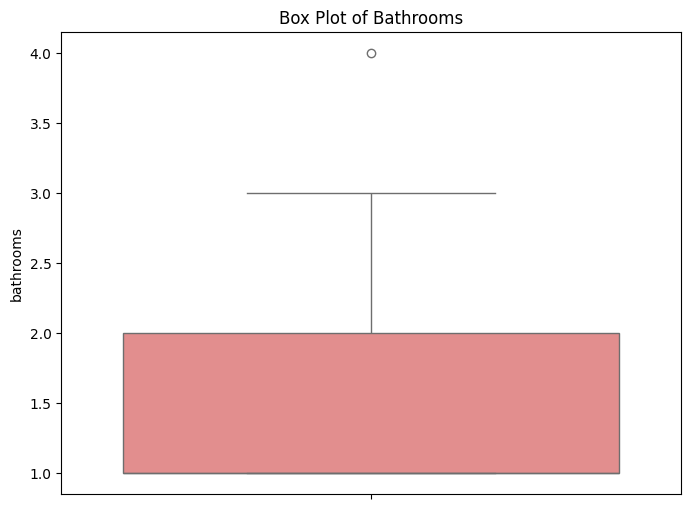


 DATA CLEANING AFTER REMOVING OUTLIERS


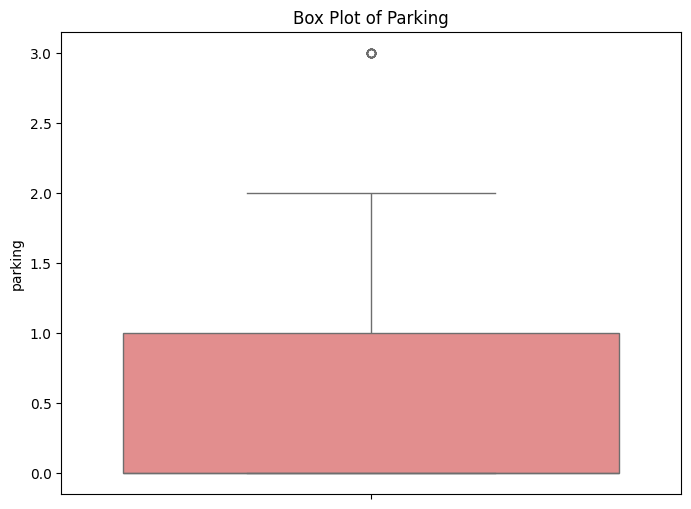

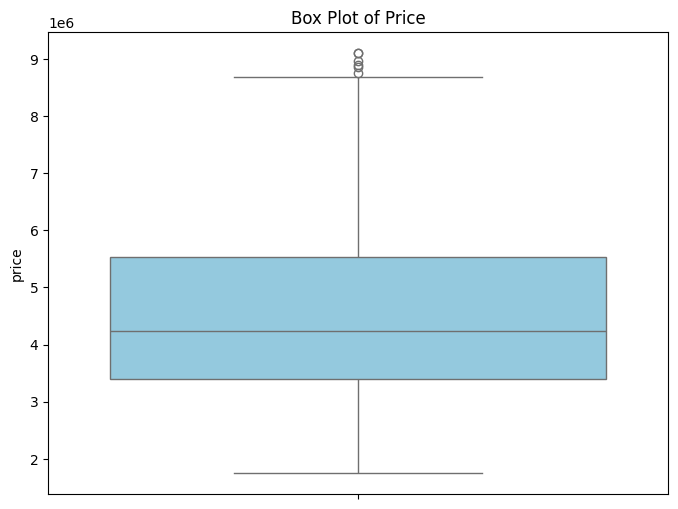

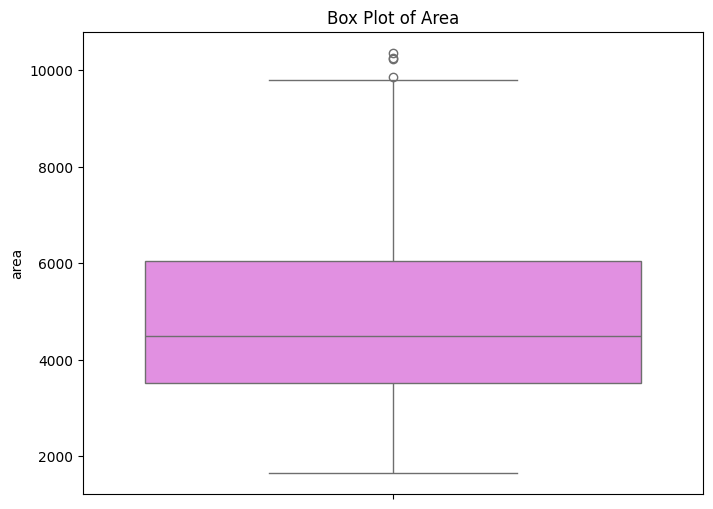

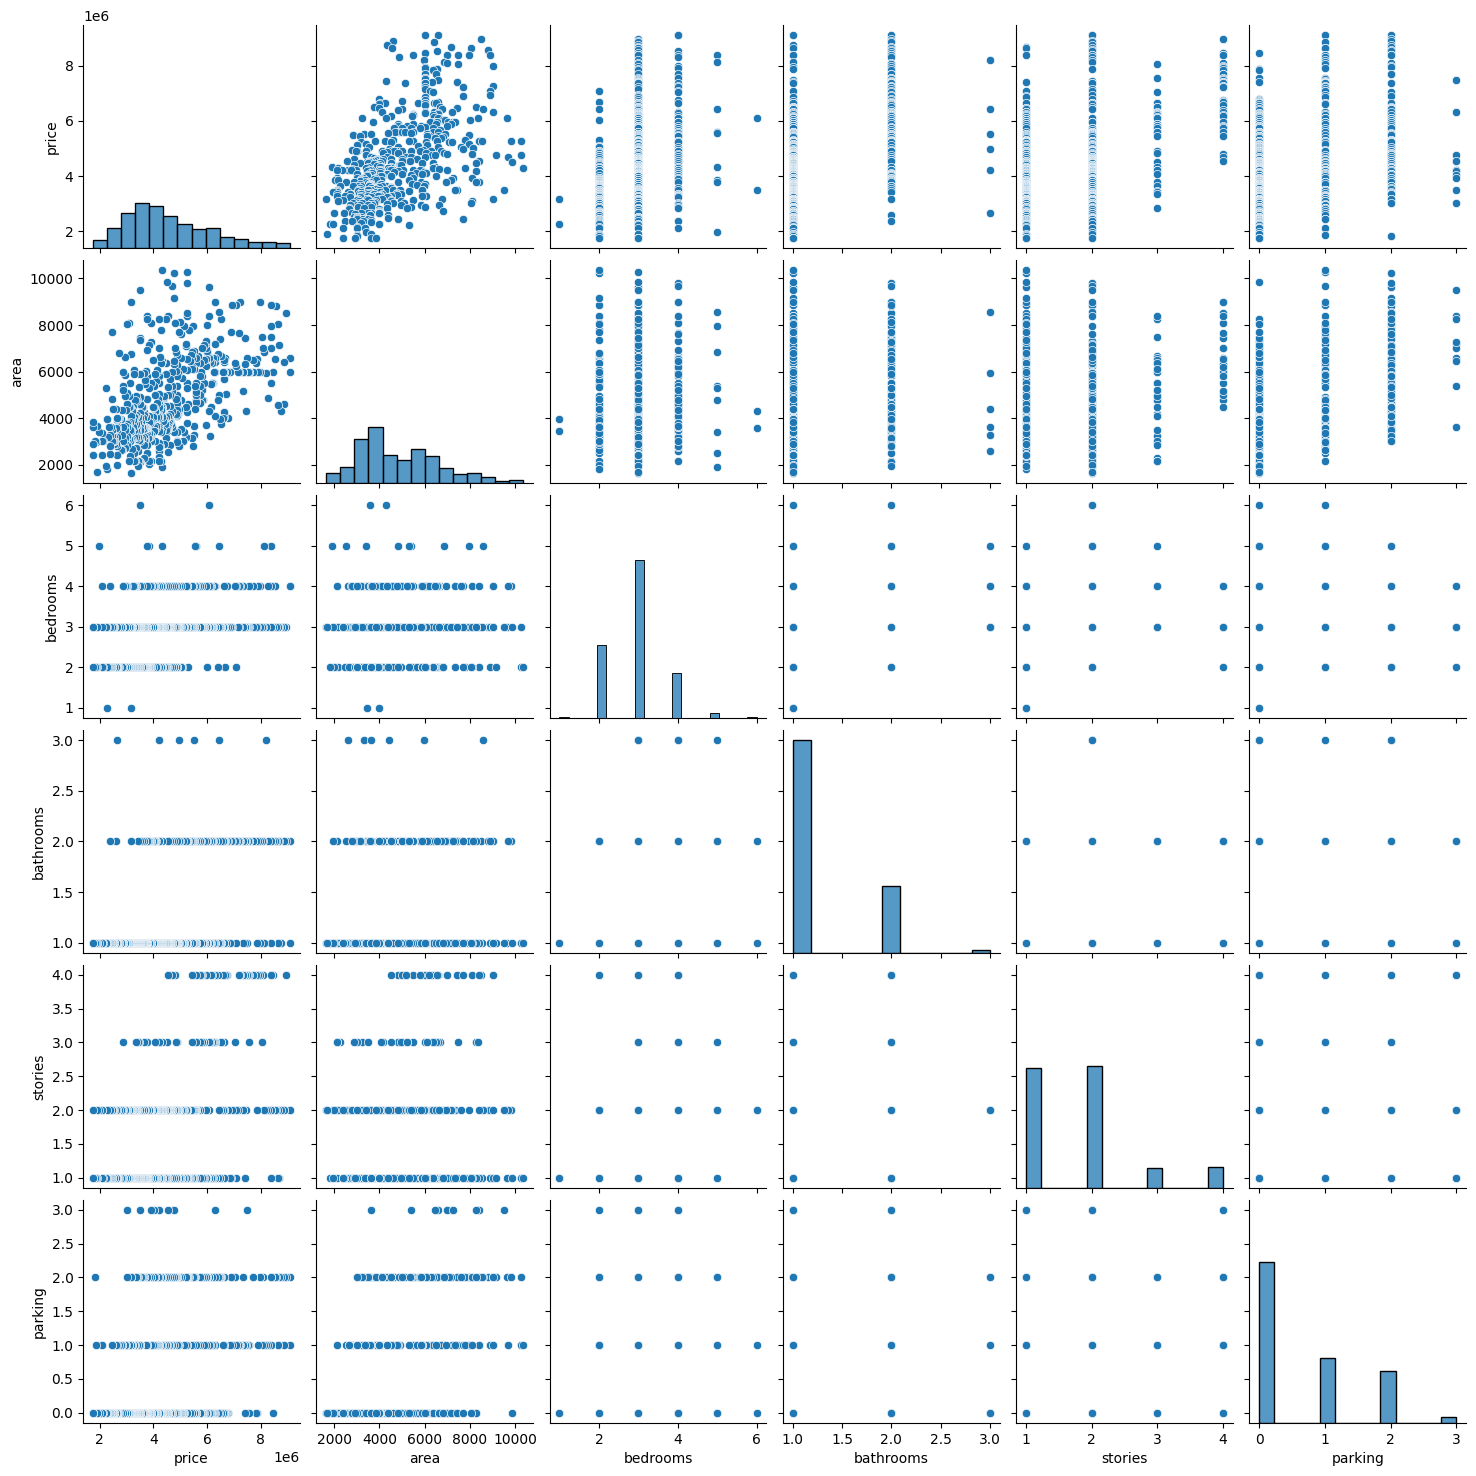


 DATA ENCODING

 CORRELATION MATRIX


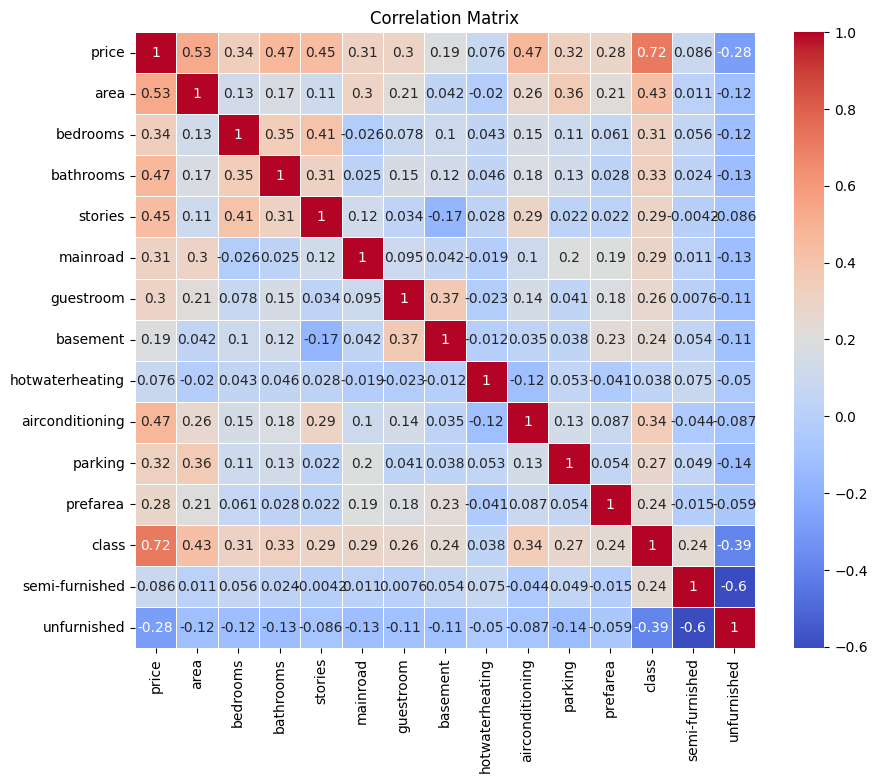

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15   9100000  6000         4          1        2         1          0   
16   9100000  6600         4          2        2         1          1   
17   8960000  8500         3          2        4         1          0   
18   8890000  4600         3          2        2         1          1   
19   8855000  6420         3          2        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  class  \
15          1                0                

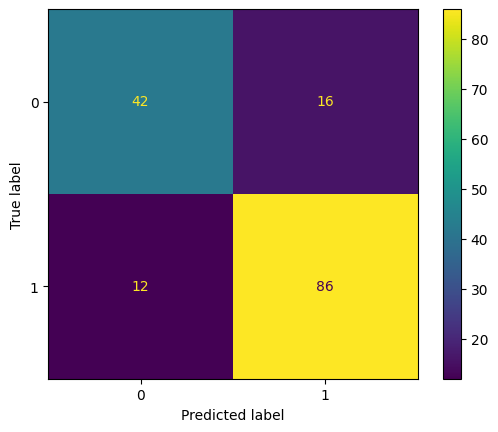

Accuracy Score =  0.8205128205128205

 Classification Report = 
              precision    recall  f1-score   support

         low       0.78      0.72      0.75        58
        high       0.84      0.88      0.86        98

    accuracy                           0.82       156
   macro avg       0.81      0.80      0.80       156
weighted avg       0.82      0.82      0.82       156



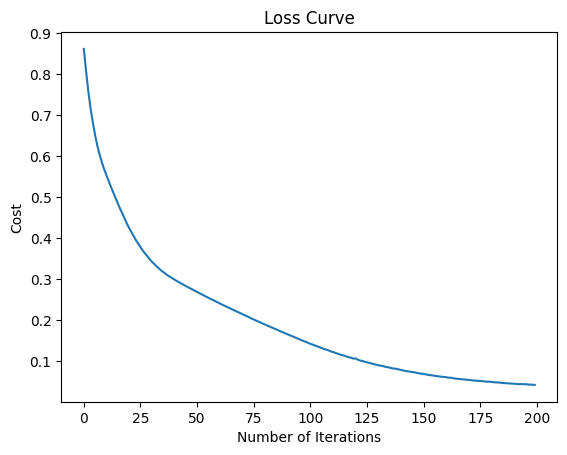

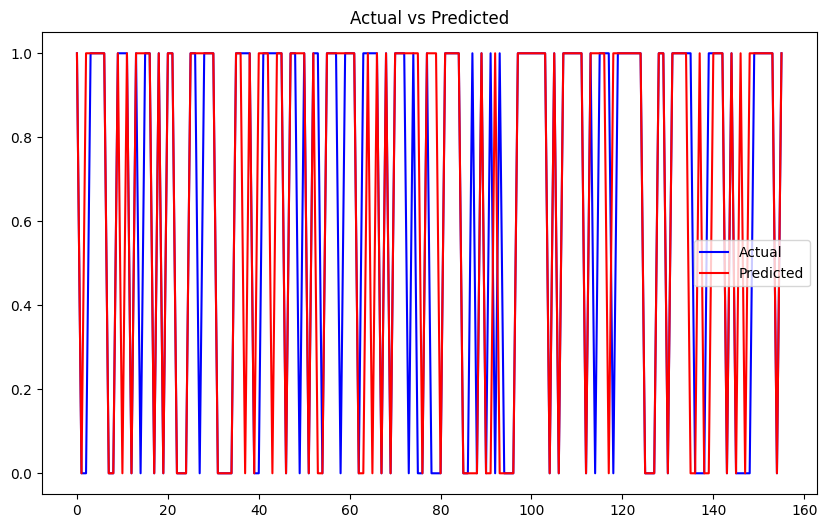

' \ninspection_frequency = int(input("Enter the Inspection Frequency: "))\ncompliant = int(input("Enter the Compliant: "))\nunit_count = int(input("Enter the Unit Count: "))\nunits_inspected = int(input("Enter the Units Inspected: "))\naverage_violations_per_unit = float(input("Enter the Average Violations Per Unit: "))\nno_violations_observed = int(input("Enter the No Violations Observed: "))\ninfested_units_percentage = float(input("Enter the Infested Units Percentage: "))\nunits_with_mold = float(input("Enter the Units with Mold: "))\n\nprint("\n New instance features")\nprint("Inspection Frequency: ", inspection_frequency)\nprint("Compliant: ", compliant)\nprint("Unit Count: ", unit_count)\nprint("Units Inspected: ", units_inspected)\nprint("Average Violations Per Unit: ", average_violations_per_unit)\nprint("No Violations Observed: ", no_violations_observed)\nprint("Infested Units Percentage: ", infested_units_percentage)\nprint("Units with Mold: ", units_with_mold)\n\n\nnew_data 

In [1]:
"""
Created March 2024

@author: Gideon Assafuah

Neural Network Classifier for prediction Assigment
Implemented as Deep Learning
"""

#Load necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

label_encoder = LabelEncoder()

class MLP_NN_Classifier:   
             
    def load_Data(self, filepath): 
        df = pd.read_csv(filepath)
        
        self.df = df
        
        print(df.head())
        
        print(df.shape)  
    
    def clean_data(self):

        # new columns are  price	area	bedrooms	bathrooms	stories	mainroad	guestroom	basement	hotwaterheating	airconditioning	parking	prefarea	furnishingstatus
        #Clean the data
        df = self.df

        print("\n DATA CLEANING")

        # checking for null values
        print("\n Null Values")
        print(df.isnull().sum()*100/df.shape[0])

        # we get no null values

        # plot a boxplot of numerical columns
        print("\n BOX PLOT")

        # box plot fo price
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['price'], color='skyblue')
        plt.title('Box Plot of Price')
        plt.show()

        # box plot of area
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['area'], color='violet')
        plt.title('Box Plot of Area')
        plt.show()

        # box plot of bedrooms
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['bedrooms'], color='green')
        plt.title('Box Plot of Bedrooms')
        plt.show()

        # box plot of bathrooms
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['bathrooms'], color='lightcoral')
        plt.title('Box Plot of Bathrooms')
        plt.show()

        # box plot of parking
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['parking'], color='lightcoral')
        plt.title('Box Plot of Parking')

        # from the box plot, we can see that there are outliers in the price and area columns
        # we will remove the outliers

        # remove outliers from the price column
        Q1 = df.price.quantile(0.25)
        Q3 = df.price.quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

        # remove outliers from the area column
        Q1 = df.area.quantile(0.25)
        Q3 = df.area.quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

        print("\n DATA CLEANING AFTER REMOVING OUTLIERS")

        # plot the box plot of the price column after removing outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['price'], color='skyblue')
        plt.title('Box Plot of Price')
        plt.show()

        # plot the box plot of the area column after removing outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(df['area'], color='violet')
        plt.title('Box Plot of Area')
        plt.show()


        sns.pairplot(df)
        plt.show()

        #  classify price features into low and high. If the price of the house >= 0 and <= 3750000, then the cost of the home is ”low,” whereas if >= 3750000
        #  then the price of the house is considered ”high.”
        df['class'] = df['price'].apply(lambda x: 'low' if x <= 3750000 else 'high')

        self.df = df




    def preprocess_data(self):
        #Preprocess the data
        
        df = self.df
        
        print('\n DATA ENCODING')   

        # List of variables to map

        varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

        # Defining the map function
        def binary_map(x):
            return x.map({'yes': 1, "no": 0})

        def binary_map_class(x):
            return x.map({'low': 0, "high": 1})

        # Applying the function to the housing list
        df[varlist] = df[varlist].apply(binary_map)  

        # Applying the function to the class list
        df['class'] = df[['class']].apply(binary_map_class)

        # Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
        status = pd.get_dummies(df['furnishingstatus'])

        # Check what the dataset 'status' looks like
        status.head()

        # Let's drop the first column from status df using 'drop_first = True'

        status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

        # Add the results to the original housing dataframe

        df = pd.concat([df, status], axis = 1)
        # Now let's see the head of our dataframe.

        df.head(10)

        # Drop 'furnishingstatus' as we have created the dummies for it

        df.drop(['furnishingstatus'], axis = 1, inplace = True)

        # correlation matrix
        print("\n CORRELATION MATRIX")
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()               
               
        features = df[[
                'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'semi-furnished', 'unfurnished'
                ]]
        label = df['class']
        print(df)
        
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)
                        
        scaleD = StandardScaler()
        scaled_X_train = scaleD.fit_transform(X_train)
        scaled_X_test = scaleD.transform(X_test)   
               
        print(scaled_X_train.shape, ': Scaled Training data size')
        print(scaled_X_test.shape, ': Scaled Test data size')           
                      
        self.X_train = X_train 
        self.scaled_X_train = scaled_X_train
        self.X_test = X_test
        self.scaled_X_test = scaled_X_test
        self.y_train = y_train
        self.y_test = y_test  
        self.scaleD = scaleD
        
    def train_NN_Deep_Learning(self):  
        scaled_X_train = self.scaled_X_train
        scaled_X_test = self.scaled_X_test
        y_train = self.y_train
        
        NNclass = MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation="relu", solver='adam', max_iter=200, random_state=42)
        NNclass.fit(scaled_X_train, y_train)           
        pred_y = NNclass.predict(scaled_X_test)
        
        self.NNclass = NNclass 
        self.pred_y = pred_y
        
    def evaluate_NNetworks(self):      
        
        print('\n NEURAL NETWORK PERFORMANCE EVALUATIONS')
                        
        NNclass = self.NNclass
       
        cm = confusion_matrix(self.y_test, self.pred_y, labels=NNclass.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NNclass.classes_)
        disp.plot()
        plt.show()
            
        print("Accuracy Score = ", accuracy_score(self.y_test, self.pred_y))
        
        print('\n Classification Report = ') 


        print(classification_report(self.y_test, self.pred_y, target_names = ['low', 'high']))
                
        #Visualize the error graph
        plt.plot(self.NNclass.loss_curve_)
        plt.title("Loss Curve", fontsize=12)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost')
        plt.show()

        # visualize the predictions
        plt.figure(figsize=(10, 6))
        plt.plot(self.y_test.values, color='blue', label='Actual')
        plt.plot(self.pred_y, color='red', label='Predicted')
        plt.title('Actual vs Predicted')
        plt.legend()
        plt.show()

    def predict_new_instance(self, new_instance):                                                
        pred_instance_type = self.NNclass.predict(new_instance)
        new_prediction =  label_encoder.inverse_transform(pred_instance_type)
        print('\n Analysis rating = ', new_prediction) 





        
#--------------------------class driver--------------------------------------------------------
handle = MLP_NN_Classifier()

filepath = 'house_prices.csv'

handle.load_Data(filepath)

handle.clean_data()

# andle.visualize_data()

handle.preprocess_data()

handle.train_NN_Deep_Learning()

handle.evaluate_NNetworks()

# Deployment of the model for dataset 1
# new data
""" 
inspection_frequency = int(input("Enter the Inspection Frequency: "))
compliant = int(input("Enter the Compliant: "))
unit_count = int(input("Enter the Unit Count: "))
units_inspected = int(input("Enter the Units Inspected: "))
average_violations_per_unit = float(input("Enter the Average Violations Per Unit: "))
no_violations_observed = int(input("Enter the No Violations Observed: "))
infested_units_percentage = float(input("Enter the Infested Units Percentage: "))
units_with_mold = float(input("Enter the Units with Mold: "))

print("\n New instance features")
print("Inspection Frequency: ", inspection_frequency)
print("Compliant: ", compliant)
print("Unit Count: ", unit_count)
print("Units Inspected: ", units_inspected)
print("Average Violations Per Unit: ", average_violations_per_unit)
print("No Violations Observed: ", no_violations_observed)
print("Infested Units Percentage: ", infested_units_percentage)
print("Units with Mold: ", units_with_mold)


new_data = [[inspection_frequency, compliant, unit_count, units_inspected, average_violations_per_unit, no_violations_observed, infested_units_percentage, units_with_mold]]
handle.predict_new_instance(new_data)  """
